In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# CSVフォーマット:DateTime,CartVoltage,CartState,CartSpeedMps,CartRotationDps,TotalPathCount,LastPathIndex,StorobePower,ExposureMs,AvailableInternalStorageMB,AvailableExternalStorageMB
df = pd.read_csv("C:/Users/ixssk/Desktop/ah01-2 monitoring pc pick up/Log/AH01Monitoring_UnitNo2/20200929_AH01Monitoring_UnitNo2.csv", sep=',')
df = df.dropna()
df = df[df.CartVoltage > 20]  # remove outlier (<20V data)
df = df.reset_index(drop=True)
df.head()

,DateTime,CartVoltage,CartState,CartSpeedMps,CartRotationDps,TotalPathCount,LastPathIndex,StorobePower,ExposureMs,AvailableInternalStorageMB,AvailableExternalStorageMB
0,2020/09/29 10:00:34.076,25.259,MAPPING,0.0,0.0,-1,-1,4.0,0.1,796855.0,0.0
1,2020/09/29 10:00:35.028,25.462,MAPPING,0.0,0.0,-1,-1,4.0,0.1,796855.0,0.0
2,2020/09/29 10:00:35.954,25.636,MAPPING,0.0,0.0,-1,-1,4.0,0.1,796855.0,0.0
3,2020/09/29 10:00:36.911,25.491,MAPPING,0.0,0.0,-1,-1,4.0,0.1,796855.0,0.0
4,2020/09/29 10:00:38.159,25.520,MAPPING,0.0,0.0,-1,-1,4.0,0.1,796855.0,0.0


In [3]:
def time_as_unixtime(time_as_text):
    # yyyy/mm/dd hh:mm:ss.ffffff形式の文字列をunixtimeに変換する
    return datetime.strptime(time_as_text, '%Y/%m/%d %H:%M:%S.%f').timestamp()
df['timestamp'] = list(map(time_as_unixtime, df.DateTime))
df['dt'] = df.timestamp - df.timestamp[0]
df['norm_dt'] = -1 * (df.dt / df.dt.values[-1:][0] - 1)

<IPython.core.display.Javascript object>


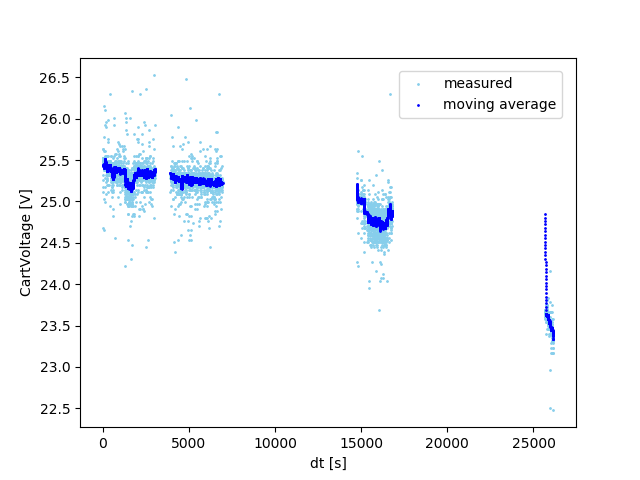

In [4]:
# check import data
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df.dt, df.CartVoltage, s=1, c='skyblue', label='measured')
ax1.scatter(df.dt, df.CartVoltage.rolling(30).mean(), s=1, c='blue', label='moving average')
ax1.set_xlabel('dt [s]')
ax1.set_ylabel('CartVoltage [V]')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, fontsize=10)
plt.show()

In [5]:
# curve fitting
def func(x,a,b,c):
    # y = a + b * log2(x + c)
    return  a + b * np.log(x + c) / np.log(2)
param, cov = curve_fit(func, df.norm_dt[:-2], df.CartVoltage[:-2])

C:\home\bin\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


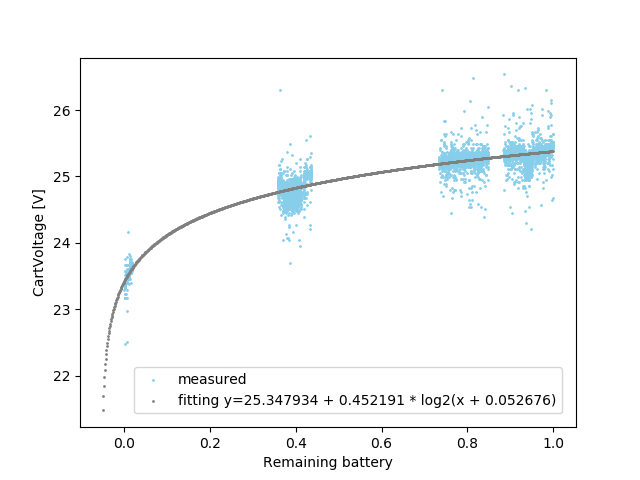

In [6]:
# check fitting result
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df.norm_dt, df.CartVoltage, s=1, c='skyblue', label='measured')
ideal_x = np.arange(-0.05,1,0.001)
ideal_y = [func(x, param[0], param[1], param[2]) for x in ideal_x]
ax1.scatter(ideal_x, ideal_y, s=1, c='gray', label='fitting y=%f + %f * log2(x + %f)' % (param[0], param[1], param[2]))
ax1.set_xlabel('Remaining battery')
ax1.set_ylabel('CartVoltage [V]')
plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1, fontsize=10)
plt.show()

In [97]:
df.to_csv('test.csv')